     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

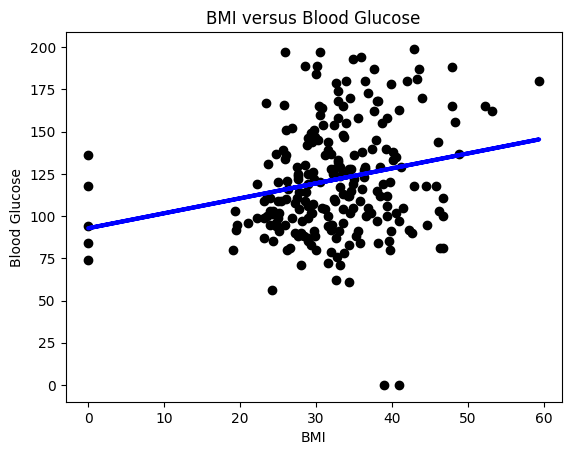

In [2]:
import numpy as np
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns # Easier syntax for writing matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('/workspaces/D2I-Jupyter-Notebook-Tools/ml-data science tutorials/data/diabetes.csv')
print(df)

y = df['Glucose'].to_numpy().reshape(-1, 1)
X = df['BMI'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

regr = linear_model.LinearRegression() # This is a class - a way of storing functions and data in the same object. "Regr" is an instance of this class.

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)


# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
# The coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI versus Blood Glucose')

plt.show()

* Here coefficient is feature importance, or how much weight the feature provides in the analysis, magnitude of feature importance is relative. Here we have only one value so we can't do much with relative importance.
* Mean Squared Error is the average of the squares of our errors, lower values mean lower error, lower values mean the forecast is closer to the actual values, lower means better fit.Again, we would use this to compare it to MSE in another model to see which model does best.
* R squared a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit). It says how many of the predictors explain the variation in y.

In [26]:
import statsmodels.api as sm
mod = sm.OLS(y_pred,X_test)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1    1.088842e-167
Name: P>|t|, dtype: float64

The p value is a number, calculated from a statistical test, that describes how likely you are to have found a particular set of observations if the null hypothesis were true. P values are used in hypothesis testing to help decide whether to reject the null hypothesis. The smaller the p value, the more likely you are to reject the null hypothesis. In this case the null hypothesis is that BMI doesn't predict blood glucose. The p value is a proportion: if your p value is 0.05, that means that 5% of the time you would see a test statistic at least as extreme as the one you found if the null hypothesis was true. 1.088842e-167 is a tiny tiny number, so is strong evidence that BMI is correlated with glucose.

In [ ]:
prediction_df = pd.DataFrame()
prediction_df['BMI'] = np.arange(60, 70, 1) # by default, step size (third argument) is 1
prediction_df['Glucose'] = regr.predict(np.arange(60, 70).reshape(-1, 1))

prediction_df

,BMI,Glucose
0,60,145.940854
1,61,146.826438
2,62,147.712022
3,63,148.597605
4,64,149.483189
5,65,150.368773
6,66,151.254356
7,67,152.139940
8,68,153.025524
9,69,153.911107


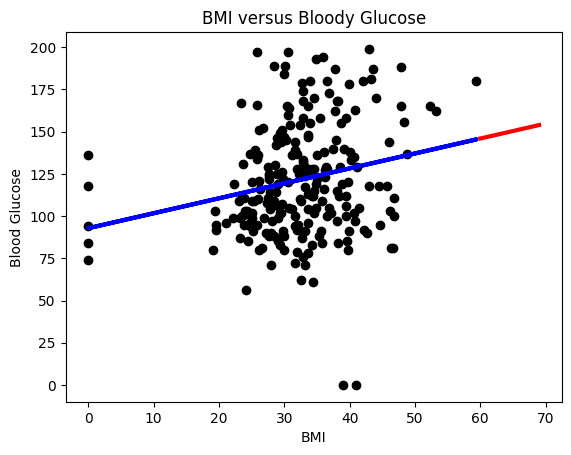

In [ ]:
plt.clf() # Clear axes in plt
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('BMI')
plt.ylabel('Blood Glucose')

plt.title('BMI versus Blood Glucose')

plt.plot(prediction_df['BMI'], prediction_df['Glucose'], color="red", linewidth=3)
plt.show()

In [4]:
from scipy import stats
res = stats.pearsonr(df['BMI'], df['Glucose'])
res

PearsonRResult(statistic=0.22107106945898294, pvalue=5.891412527084351e-10)